<a href="https://colab.research.google.com/github/tobinw23/2023-baseball-project/blob/main/NYY_1973_2023_wRC%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pybaseball

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.2/350.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [221]:
import pandas as pd
import numpy as np
import pybaseball as pyb
import matplotlib.pyplot as plt
import string

In [196]:
from pybaseball import  playerid_lookup
from pybaseball import batting_stats
pd.set_option('display.max_columns', None)
data = batting_stats(1973, 2023)
data.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,70,31,2,46,117,110,198,68,47,9,2,0,4,9,2,0.370,109.0,169.0,80.0,16.0,2398.0,1336.0,1062.0,5.0,0.0,0.0,0.324,0.077,4.21,0.582,0.799,1.381,0.429,0.330,0.0064,0.223,0.304,0.472,0.095,0.272,0.046,0.0,0.544,110.0,183,110.1,4.3,18.6,-6.3,126.8,12.7,$49.5,3.9,244,10.51,-5.90,16.40,118.51,12.63,0.98,3.23,4.0,11.82,-1.11,0.678,89.0,0.108,79.9,NaN,NaN,0.081,74.2,0.107,76.5,0.026,80.5,NaN,NaN,0.081,NaN,67.8,12.5,NaN,5.1,19.2,0.8,NaN,4.54,5.27,NaN,2.84,8.13,1.37,NaN,0.113,0.702,0.366,0.401,0.899,0.811,0.430,0.453,0.063,-1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.9,-4.4,37 - 37,108.9,1.3,2.3,0.447,0.310,0.243,0.095,0.522,0.383,0.476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139,347,47,171,189,273,111,1.05,70.0,135.0,249.0,105.0,106.0,87.0,64.0,83.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN,12.7
2,1109,2001,Barry Bonds,SFG,36,153,476,664,156,49,32,2,73,129,137,177,35,93,9,2,0,5,13,3,0.328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267,0.140,1.90,0.515,0.863

In [64]:
data['wRC'].head(15)

0      183
2      200
1      185
31     162
71     129
429    129
18     157
55     139
3      148
56     125
189    140
362    121
413    114
178    146
21     171
Name: wRC, dtype: int64

In [65]:
data['wRC'].mean()

80.72836070136377

In [93]:
nyy_data=data.groupby(['Team'])

In [117]:
nyy=nyy_data.get_group('NYY')

In [72]:
filt = data['Team']=='NYY'
data.loc[filt]['wRC'].value_counts().head(50)

72     11
70      8
76      8
94      8
93      8
77      7
75      7
83      7
89      7
96      6
92      6
59      6
74      5
78      5
86      5
81      5
97      5
82      5
88      4
109     4
95      4
111     4
100     4
113     4
110     4
115     4
69      4
73      4
66      4
68      4
108     3
102     3
58      3
56      3
47      3
105     3
64      3
49      3
117     3
116     3
119     3
84      3
90      3
103     3
118     3
112     3
106     3
124     2
60      2
63      2
Name: wRC, dtype: int64

In [88]:
nyy['wRC'].median()

86.0

In [95]:
print(nyy)

         IDfg  Season              Name Team  Age    G   AB   PA    H   1B  \
31      15640    2022       Aaron Judge  NYY   30  157  570  696  177   87   
315       194    1985  Rickey Henderson  NYY   26  143  547  654  172  115   
65       1274    2007    Alex Rodriguez  NYY   31  158  583  708  183   98   
100      1274    2005    Alex Rodriguez  NYY   29  162  605  715  194  116   
130     15640    2017       Aaron Judge  NYY   25  155  542  678  154   75   
...       ...     ...               ...  ...  ...  ...  ...  ...  ...  ...   
4641  1008261    1995     Don Mattingly  NYY   34  128  458  507  132   91   
3179      857    2004   Bernie Williams  NYY   35  148  561  651  147   95   
3750  1005259    1991          Mel Hall  NYY   30  141  492  527  140   96   
7090  1011441    1988    Rafael Santana  NYY   30  148  480  521  115   98   
6157      857    2005   Bernie Williams  NYY   36  141  485  546  121   89   

      2B  3B  HR    R  RBI   BB  IBB   SO  HBP  SF  SH  GDP  SB

In [127]:
nyy.groupby('Season')['wRC+'].nlargest(2)

Season      
1973    1234    141
        1852    133
1974    2093    132
        2913    124
1975    611     151
               ... 
2021    1714    138
2022    31      209
        2781    134
2023    3322    123
        5638    101
Name: wRC+, Length: 102, dtype: int64

In [130]:
nyy_sort= nyy.sort_values(by='wRC+', ascending=False)
nyy_sort


,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
31,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,28,0,62,133,131,111,19,175,6,5,0,14,16,3,0.311,149.0,174.0,77.0,8.0,2906.0,1176.0,1730.0,11.0,0.0,0.0,0.159,0.251,0.63,0.425,0.686,1.111,0.375,0.340,0.0086,0.193,0.373,0.435,0.046,0.356,0.074,0.000,0.458,82.1,162,85.0,5.2,20.8,-4.1,110.4,11.6,$92.7,4.0,209,7.74,-10.71,18.44,82.07,8.81,1.08,2.54,4.0,8.60,-1.43,0.437,94.1,0.258,84.6,0.072,88.1,0.077,80.6,0.124,85.1,0.032,88.2,NaN,NaN,0.023,NaN,43.0,24.2,1.3,5.2,5.6,-1.1,NaN,3.38,3.24,0.63,2.31,1.54,-1.20,NaN,0.269,0.676,0.425,0.517,0.852,0.722,0.385,0.579,0.118,2.1,0.275,NaN,0.068,0.023,NaN,0.160,0.257,0.070,0.012,0.001,0.134,NaN,NaN,NaN,94.4,NaN,87.8,88.3,NaN,93.6,85.0,79.7,80.9,51.5,85.2,NaN,NaN,-2.3,NaN,1.3,-6.8,NaN,-6.3,2.6,2.4,3.4,-4.3,0.2,NaN,NaN,9.8,NaN,4.4,2.3,NaN,5.0,1.4,-4.8,-6.8,7.2,4.4,NaN,NaN,25.4,NaN,-1.4,-0.5,NaN,16.0,25.5,4.0,1.8,0.9,4.7,NaN,NaN,3.18,NaN,-0.69,-0.68,NaN,3.44,3.41,2.00,4.95,45.60,1.20,NaN,NaN,0.229,0.649,0.427,0.450,0.829,0.722,0.471,24.5,1.1,1.2,0.4,30 - 30,87.1,1.4,0.5,0.475,0.318,0.208,0.075,0.445,0.480,0.500,0.133,NaN,0.059,0.277,0.065,0.024,NaN,NaN,0.159,0.281,0.002,85.1,NaN,79.8,94.3,87.9,87.8,NaN,NaN,93.8,84.5,85.3,0.2,NaN,2.2,-1.9,1.5,-6.4,NaN,NaN,-6.1,3.3,1.1,3.1,NaN,-7.7,8.8,3.4,1.3,NaN,NaN,3.9,0.2,0.3,6.5,NaN,5.9,24.6,0.1,-1.0,NaN,NaN,15.4,24.3,-0.5,1.68,NaN,3.43,3.05,0.07,-1.42,NaN,NaN,3.33,2.98,-8.22,0.224,0.654,0.427,0.452,0.826,0.722,0.471,24.5,NaN,128,200,113,137,175,251,117,0.97,87.0,116.0,324.0,118.0,91.0,84.0,46.0,83.0,159.0,95.8,14.9,106.0,0.262,118.4,246.0,0.609,404,0.169,0.287,NaN,NaN,NaN,11.3
146,9874,2020,DJ LeMahi

In [198]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [203]:
N=2
nyy1=(nyy.sort_values(by=['Season','wRC+'], ascending=[False,False]).groupby(['Season']).head(N))
print(nyy1[['Season','Name','wRC+']].head(200))

      Season               Name  wRC+
3322    2023     Gleyber Torres   123
5638    2023        DJ LeMahieu   101
31      2022        Aaron Judge   209
2781    2022      Anthony Rizzo   134
925     2021        Aaron Judge   150
1714    2021  Giancarlo Stanton   138
146     2020        DJ LeMahieu   177
719     2020          Luke Voit   153
1440    2019        DJ LeMahieu   136
2295    2019          Luke Voit   126
2290    2018        Aaron Hicks   129
2227    2018     Miguel Andujar   129
130     2017        Aaron Judge   174
1851    2017       Gary Sanchez   131
5360    2016     Didi Gregorius    97
5443    2016      Brett Gardner    96
2225    2015     Alex Rodriguez   129
3242    2015     Carlos Beltran   119
4424    2014      Brett Gardner   112
4756    2014    Jacoby Ellsbury   109
1029    2013      Robinson Cano   143
4171    2013      Brett Gardner   109
691     2012      Robinson Cano   149
2104    2012       Nick Swisher   128
722     2011  Curtis Granderson   146
1456    2011

Text(0, 0.5, 'wRC+')

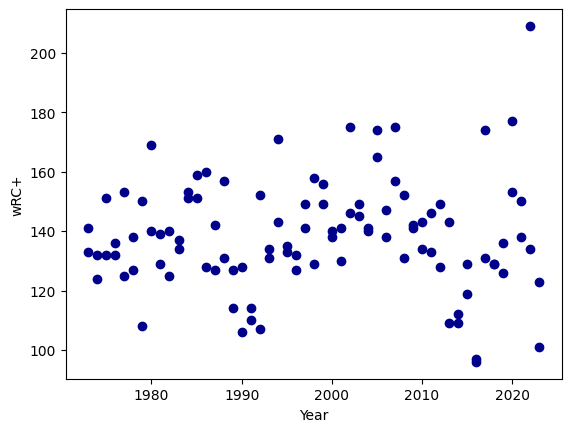

In [219]:
fig,ax = plt.subplots()
ax.scatter(x=nyy1['Season'],y=nyy1['wRC+'],c='DarkBlue')
ax.set_xlabel('Year')
ax.set_ylabel('wRC+')

In [220]:
for idx, row in nyy1.iterrows():
  ax.annotate(row['Name'], (row['Season'], row['wRC+']))

plt.show()

3322       Text(2023, 123, 'Gleyber Torres')
5638          Text(2023, 101, 'DJ LeMahieu')
31            Text(2022, 209, 'Aaron Judge')
2781        Text(2022, 134, 'Anthony Rizzo')
925           Text(2021, 150, 'Aaron Judge')
1714    Text(2021, 138, 'Giancarlo Stanton')
146           Text(2020, 177, 'DJ LeMahieu')
719             Text(2020, 153, 'Luke Voit')
1440          Text(2019, 136, 'DJ LeMahieu')
2295            Text(2019, 126, 'Luke Voit')
2290          Text(2018, 129, 'Aaron Hicks')
2227       Text(2018, 129, 'Miguel Andujar')
130           Text(2017, 174, 'Aaron Judge')
1851         Text(2017, 131, 'Gary Sanchez')
5360        Text(2016, 97, 'Didi Gregorius')
5443         Text(2016, 96, 'Brett Gardner')
2225       Text(2015, 129, 'Alex Rodriguez')
3242       Text(2015, 119, 'Carlos Beltran')
4424        Text(2014, 112, 'Brett Gardner')
4756      Text(2014, 109, 'Jacoby Ellsbury')
1029        Text(2013, 143, 'Robinson Cano')
4171        Text(2013, 109, 'Brett Gardner')
691       

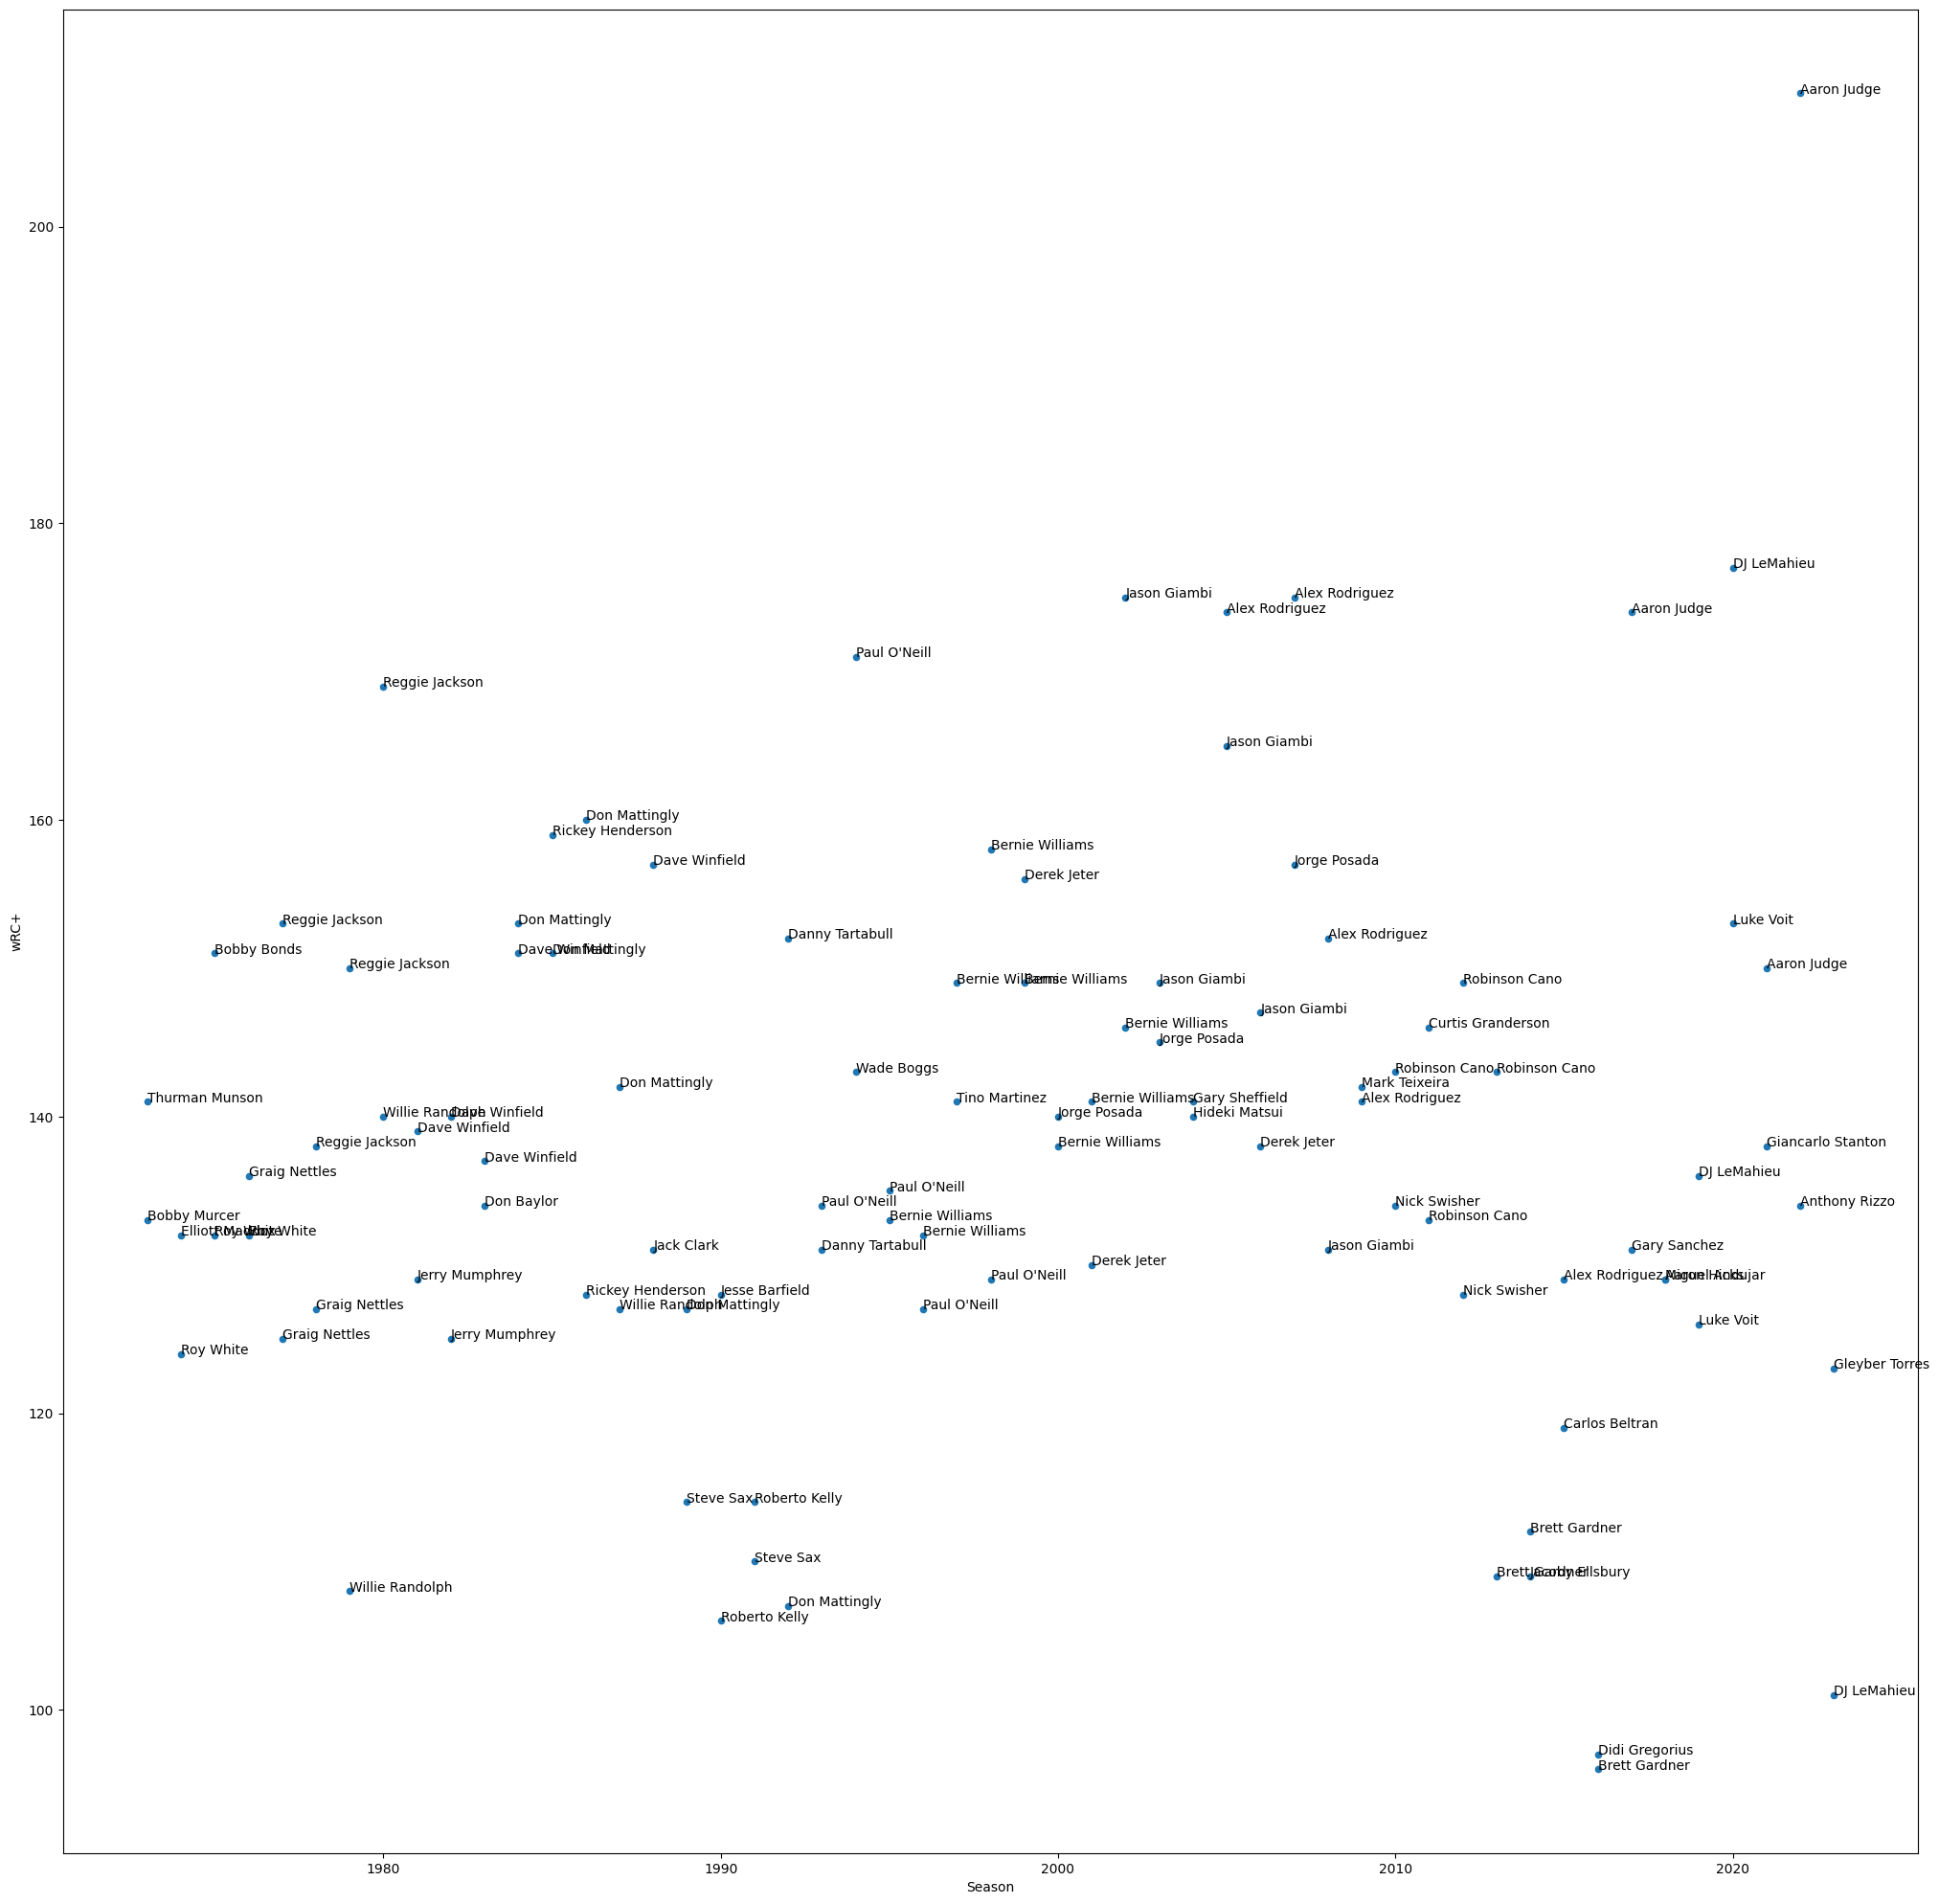

In [228]:
ax = nyy1.plot(x='Season',y='wRC+', kind='scatter',figsize=(25,25))
nyy1[['Season','wRC+','Name']].apply(lambda x:ax.text(*x),axis=1)